In [1]:
import pandas as pd
import numpy as np

In [6]:
import matplotlib
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

matplotlib.rc("font", size=18)

In [3]:
df = pd.read_csv("1.4_houses.csv")

In [16]:
df.head()

,dim_1,dim_2,level,price
0,29,28,luxury,2212.0
1,28,29,luxury,2203.0
2,6,9,basic,254.0
3,5,9,basic,242.0
4,6,6,basic,195.0


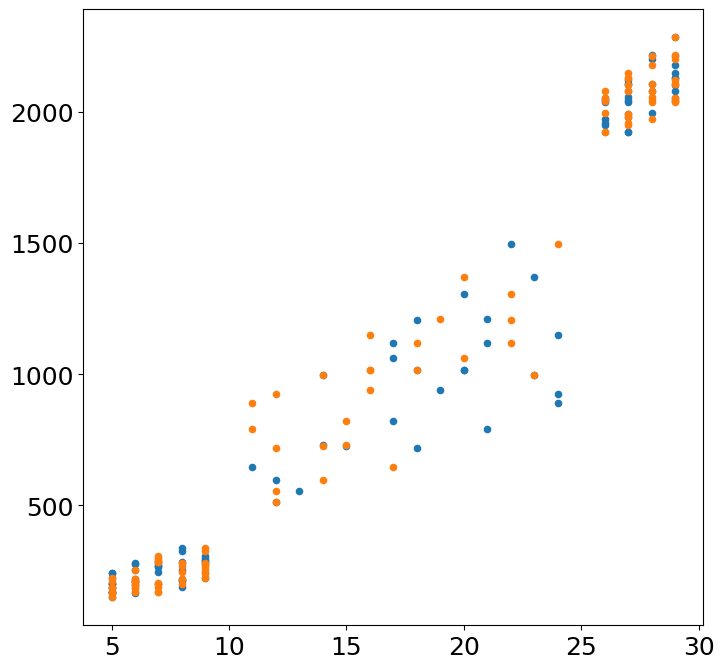

In [19]:
fig = plt.figure(figsize=(8, 8))
ax = plt.axes()

ax.scatter(df["dim_1"], df["price"], s=20)
ax.scatter(df["dim_2"], df["price"], s=20)
plt.show()

### price = f(x) = ax+b
### price = price(dim_1) = a*dim_1+b

In [20]:
from sklearn.linear_model import LinearRegression

In [29]:
X = df[["dim_1"]]
y = df["price"]

In [30]:
reg = LinearRegression().fit(X, y)

In [31]:
reg.coef_

array([83.08870109])

In [32]:
reg.intercept_

-351.68469784672334

In [33]:
b = reg.intercept_
[a] = reg.coef_

def reg_prediction(dim_1):
    return a*dim_1 + b

In [34]:
reg_prediction(X.dim_1[0])

2057.887633711507

In [39]:
reg.predict(X[["dim_1"]])[0]

2057.887633711507

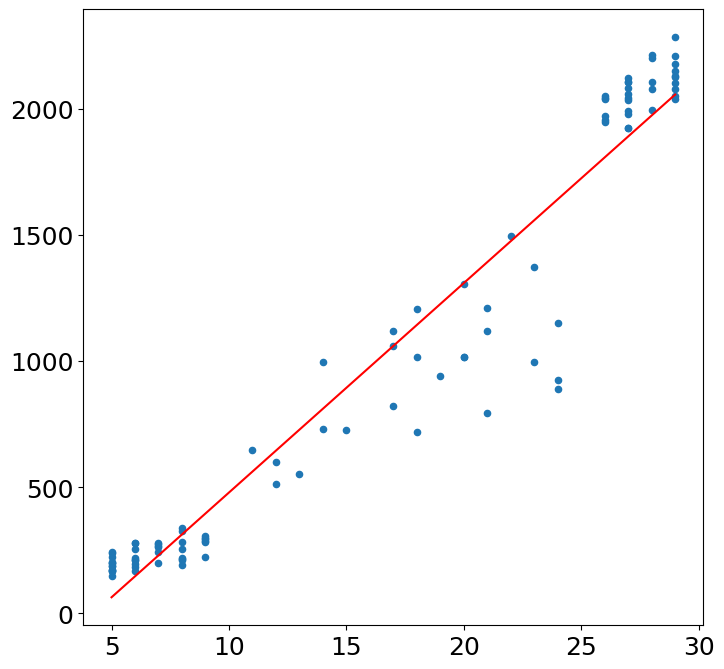

In [41]:
fig = plt.figure(figsize=(8, 8))
ax = plt.axes()

ax.scatter(df["dim_1"], df["price"], s=20)
ax.plot([X.dim_1.min(), X.dim_1.max()], [reg_prediction(X.dim_1.min()), reg_prediction(X.dim_1.max())], c="r")
plt.show()

In [42]:
X = df[["dim_1", "dim_2"]]
y = df["price"]

In [43]:
reg_2 = LinearRegression().fit(X, y)

### price(x1, x2) = a2x2+a1x1+b

In [52]:
[a1, a2] = reg_2.coef_
b = reg_2.intercept_

def reg_pred_2(x1, x2):
    return a1*x1+a2*x2+b